<a href="https://colab.research.google.com/github/Ricardo-msj/analise-renda-pnad-2015/blob/master/notebooks/analise_dados_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise Descritiva de Distribuição de Renda**  🧮
---

# Primeiro Vamos importar tudo que vamos usar.
---

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dados
---





### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

## OBS:

* UF: Qualitativa
* SEXO: Qualitativo
* IDADE: Quantitativa
* COR: Qualitativo
* ANOS DE ESTUDO: Qualitativo
* RENDA: Quantitativo
* ALTURA: Quantitativo

# Analise Inicial
---

In [6]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos_de_Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [7]:
dados.Renda.mean()

np.float64(2000.3831988547631)

In [8]:
dados.Renda.median()

1200.0

In [11]:
dados.Renda.mode()

,Renda
0,788


#OBS: **mode < median < mean**



### *“A distribuição da renda apresenta assimetria positiva, evidenciada pelo fato de a média ser superior à mediana, indicando a presença de valores extremos elevados que deslocam a média para a direita.”*

In [ ]:
dados.Renda.min()

0

In [ ]:
dados.Renda.max()

200000

In [ ]:
# k = 1 + (10/3) * (np.log10(n))
n = len(dados.Renda)
k = int(round(1 + (10/3) * (np.log10(n)), 0))


# **Distribuição de frequências simples**


---



In [ ]:
frequencia_absoluta_renda = pd.cut(
    x = dados.Renda,
    bins = k,
    include_lowest= True
).value_counts()

frequencia_absoluta_renda

In [ ]:
frequencia_relativa_renda = pd.cut(
    x = dados.Renda,
    bins = k,
    include_lowest= True
).value_counts(normalize=True) * 100

frequencia_relativa_renda

In [ ]:
intervalos_renda = pd.cut(x = dados.Renda, bins = k).cat.categories

labels = [i + 1 for i in range(len(intervalos_renda))]

data_frequencia = pd.DataFrame({
    "Classe": labels,
    "Frequencia Absoluta": frequencia_absoluta_renda,
    "Frequencia Relativa(%)": frequencia_relativa_renda
})

data_frequencia = (
    data_frequencia
    .reset_index()
)

data_frequencia

In [ ]:
classificacao_renda = pd.DataFrame({
    "Classe": [{i + 1} for i in range(len(intervalos_renda))],
    "Limite Inferior": [i.left for i in intervalos_renda],
    "Limite Superior": [i.right for i in intervalos_renda]

})

classificacao_renda

### Distribuição da Renda

O histograma abaixo apresenta a distribuição da renda mensal dos indivíduos, com classes definidas pela Regra de Sturges.


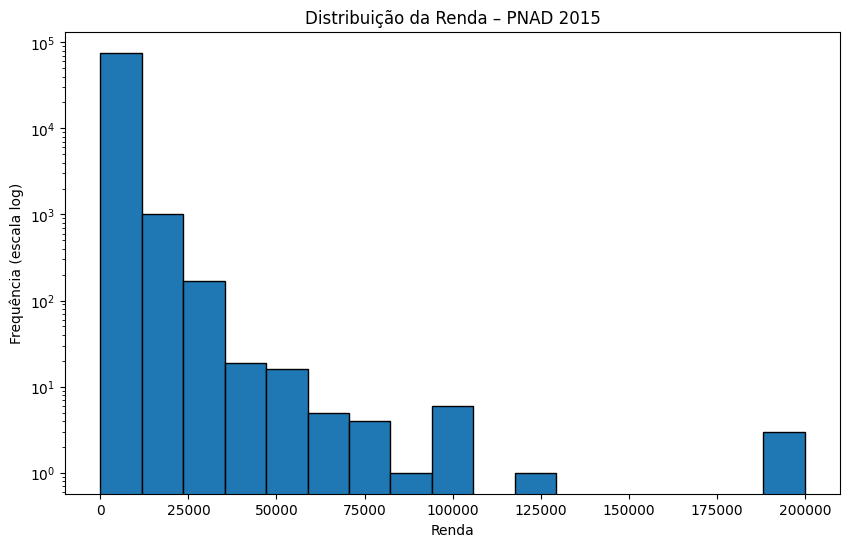

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(
    x = dados.Renda,
    bins = k,
    edgecolor = 'black'
)

plt.yscale('log')

plt.title('Distribuição da Renda – PNAD 2015')
plt.xlabel('Renda')
plt.ylabel('Frequência (escala log)')

plt.show()

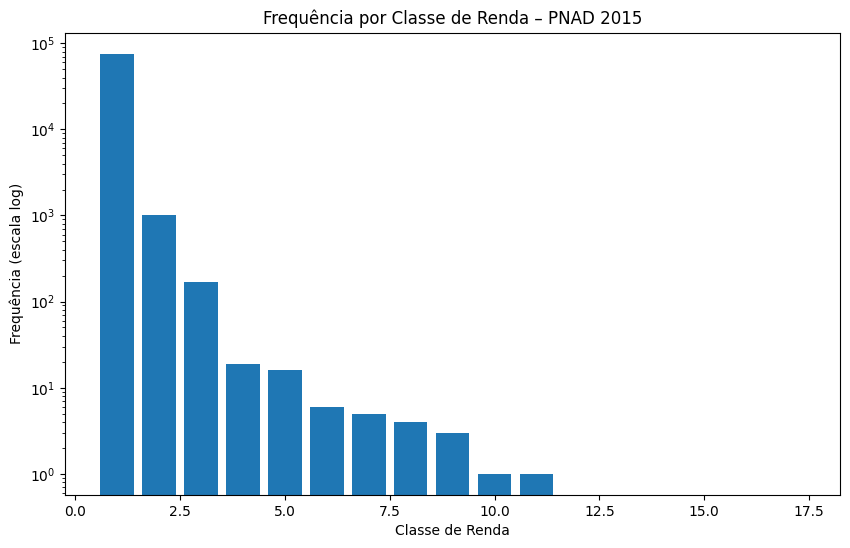

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(
    data_frequencia['Classe'],
    data_frequencia['Frequencia Absoluta']
)

plt.yscale('log')

plt.title('Frequência por Classe de Renda – PNAD 2015')
plt.xlabel('Classe de Renda')
plt.ylabel('Frequência (escala log)')

plt.show()


# **Distribuição de frequências cruzadas**


---



In [ ]:
cor = {0:'indigena',
       2:'Branca',
       4:'Preta',
       6:'Amarela',
       8:'Parda',
       9: 'Sem Declaracao'}

sexo = {0:'Masculino',
        1:'Feminino'}

estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados',
}

In [ ]:
analise_crusada_sexo = pd.crosstab(
    index = dados.Sexo,
    columns = dados.Cor,
    aggfunc= 'mean',
    values= dados.Renda
)

analise_crusada_sexo.rename(columns= cor, index = sexo, inplace= True)


analise_crusada_sexo = (
    analise_crusada_sexo
    .reset_index()
    .melt(
        id_vars='Sexo',
        var_name='Cor da pele',
        value_name='Renda média')
)

analise_crusada_sexo


,Sexo,Cor da pele,Renda média
0,Masculino,indigena,1081.710938
1,Feminino,indigena,2464.386139
2,Masculino,Branca,2925.744435
3,Feminino,Branca,2109.866750
4,Masculino,Preta,1603.861687
5,Feminino,Preta,1134.596400
6,Masculino,Amarela,4758.251064
7,Feminino,Amarela,3027.341880
8,Masculino,Parda,1659.577425
9,Feminino,Parda,1176.758516


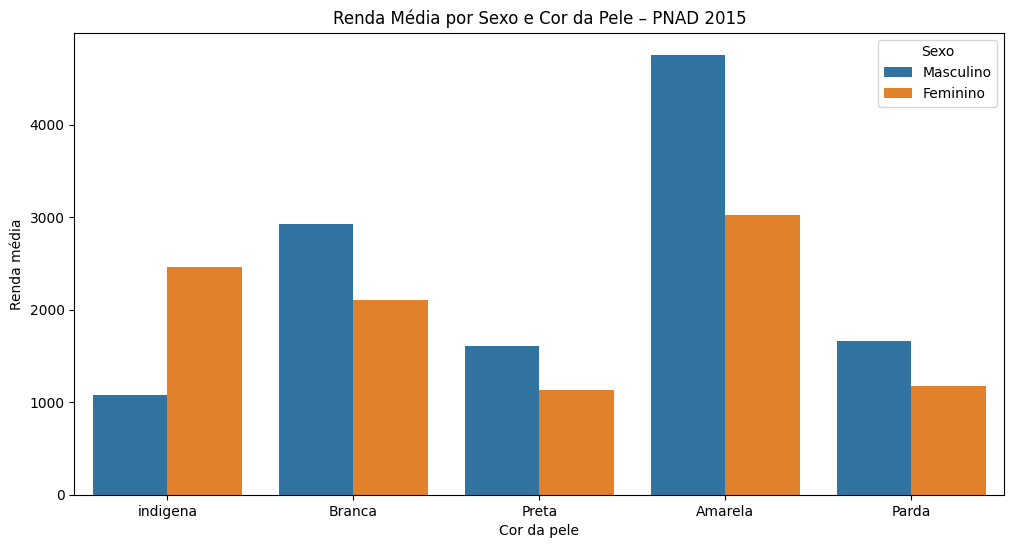

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data= analise_crusada_sexo,
    x='Cor da pele',
    y='Renda média',
    hue='Sexo'
)

plt.title('Renda Média por Sexo e Cor da Pele – PNAD 2015')
plt.xlabel('Cor da pele')
plt.ylabel('Renda média')

plt.legend(title='Sexo')
plt.show()


In [ ]:
analise_crusada_sexo = pd.crosstab(
    index = dados.Sexo,
    columns = dados.Anos_de_Estudo,
    aggfunc= 'mean',
    values= dados.Renda
)

analise_crusada_sexo.rename(columns= estudo, index = sexo, inplace= True)


analise_crusada_sexo = (
    analise_crusada_sexo
    .reset_index()
    .melt(
        id_vars='Sexo',
        var_name='Anos de Estudo',
        value_name='Renda média')
)

analise_crusada_sexo


,Sexo,Anos de Estudo,Renda média
0,Masculino,Sem instrução e menos de 1 ano,799.494638
1,Feminino,Sem instrução e menos de 1 ano,516.201748
2,Masculino,1 ano,895.629047
3,Feminino,1 ano,492.771987
4,Masculino,2 anos,931.178986
5,Feminino,2 anos,529.911638
6,Masculino,3 anos,1109.203862
7,Feminino,3 anos,546.853916
8,Masculino,4 anos,1302.329283
9,Feminino,4 anos,704.279111


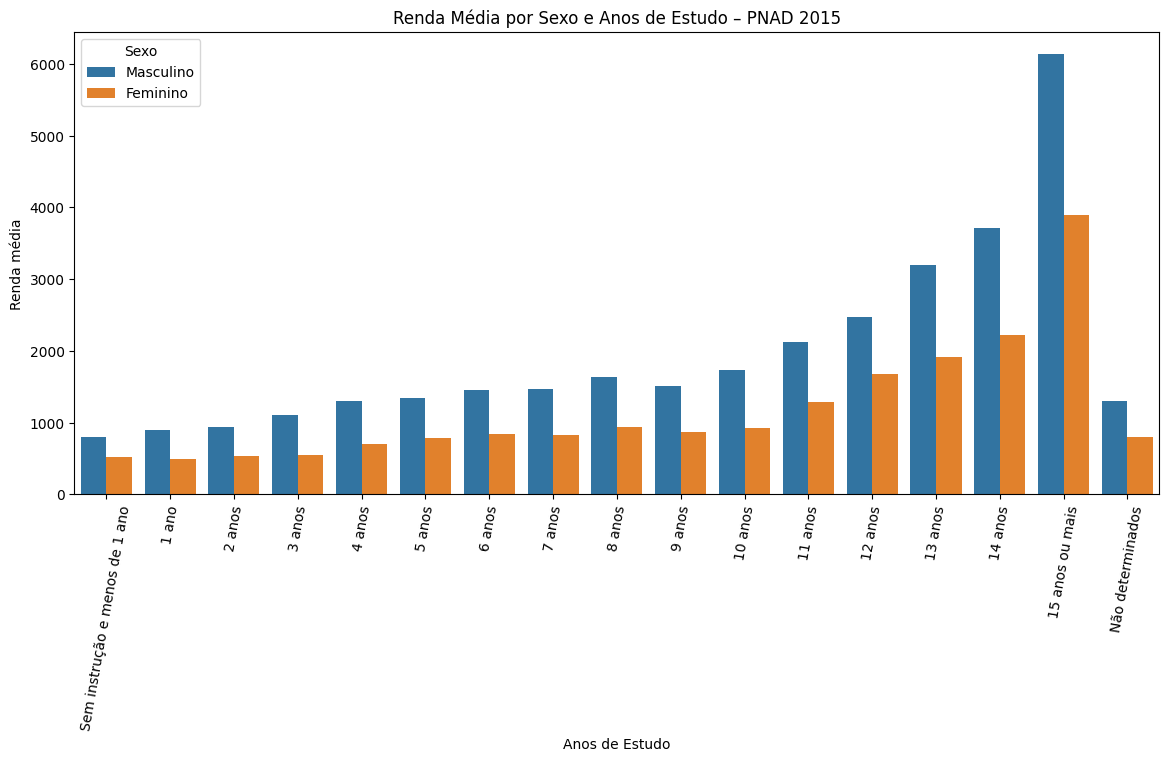

In [ ]:
plt.figure(figsize=(14, 6))

sns.barplot(
    data=analise_crusada_sexo,
    x='Anos de Estudo',
    y='Renda média',
    hue='Sexo'
)

plt.title('Renda Média por Sexo e Anos de Estudo – PNAD 2015')
plt.xlabel('Anos de Estudo')
plt.ylabel('Renda média')

plt.legend(title='Sexo')
plt.xticks(rotation=80)
plt.show()


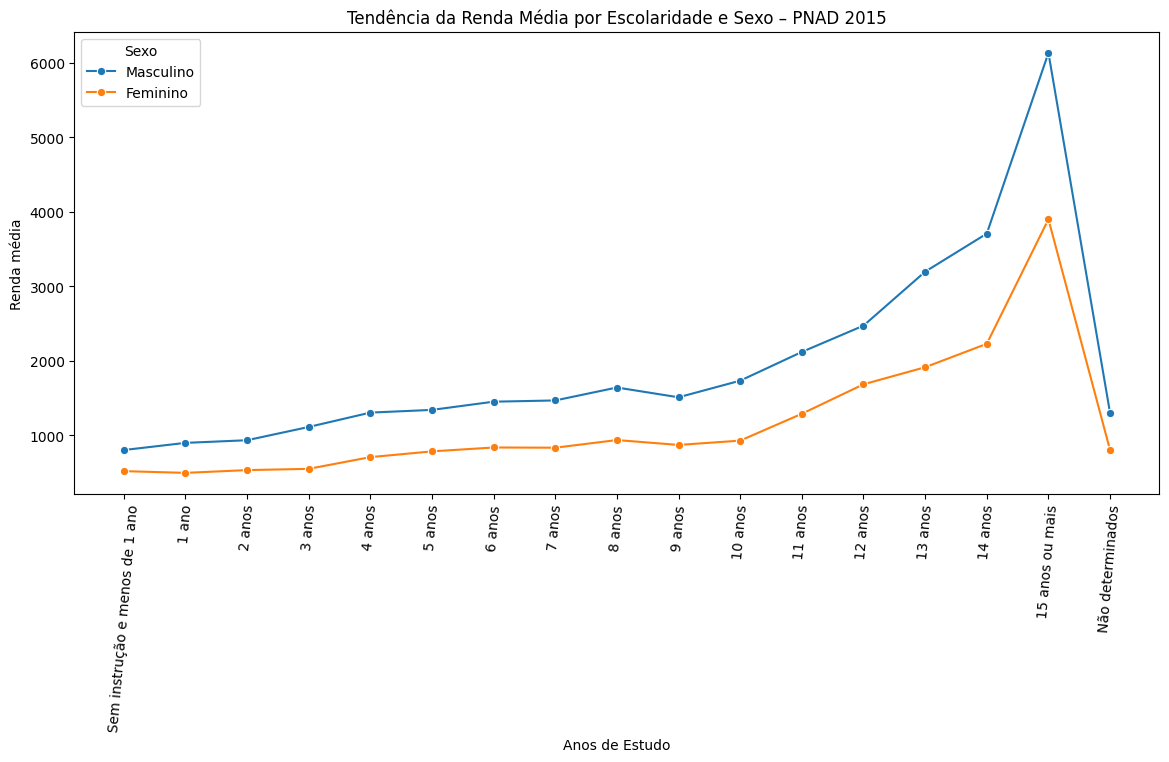

In [ ]:
plt.figure(figsize=(14, 6))

sns.lineplot(
    data=analise_crusada_sexo,
    x='Anos de Estudo',
    y='Renda média',
    hue='Sexo',
    marker='o'
)

plt.title('Tendência da Renda Média por Escolaridade e Sexo – PNAD 2015')
plt.xlabel('Anos de Estudo')
plt.ylabel('Renda média')

plt.xticks(rotation=85)
plt.show()
